### final project 

In [3]:
import requests
import requests_cache
import pandas as pd
import time

requests_cache.install_cache("mycache")

In [353]:
def read_key(keyfile):
    with open(keyfile) as f:
        return f.readline().strip("\n")

In [354]:
key = read_key("/Users/bckou/Documents/GitHub/nyt_key.txt")

In [359]:
response = requests.get("https://api.nytimes.com/svc/search/v2/articlesearch.json", params = {
    "api-key": key,
    "begin_date": "20180101",
    "end_date": "20190201",
  #  "facet_fields": "day_of_week&facet=true"
  #  "source":"The New York Times"
  #  "food_desk":("Dining" "Food"),
  #  "body":("trend" "food" "cusine"),
  #  "kicker":"Food Trends",
  #  "Section":"Food",
  #  "headline":"Cooking",
  #  "source.contains":("trends","eating"),
  #  "type_of_material":"Caption",
  #  "type_of_material.contains":"Caption",
  #  "glocation": "US"
    })
response.raise_for_status()
response



<Response [200]>

In [360]:
response.url

'https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key=XYsB1IG5H5McHknHAMZBl88U8iGumRAb&begin_date=20180101&end_date=20190201'

In [361]:
response.json()

{'status': 'OK',
 'copyright': 'Copyright (c) 2019 The New York Times Company. All Rights Reserved.',
 'response': {'docs': [{'web_url': 'https://cooking.nytimes.com/recipes/1018901-cumin-roasted-salmon-with-cilantro-sauce',
    'snippet': 'Roasting a whole fillet of fish might seem like a weekend-only treat, but cooking salmon this way is a luxury you should allow yourself on any old Tuesday, as it requires no additional preparation or skill. Be sure to slather the vinegary herb sau...',
    'lead_paragraph': 'Roasting a whole fillet of fish might seem like a weekend-only treat, but cooking salmon this way is a luxury you should allow yourself on any old Tuesday, as it requires no additional preparation or skill. Be sure to slather the vinegary herb sauce on the still-warm salmon to allow the warm spices and fresh herbs to get to know each other better.',
    'blog': {},
    'source': 'du_recipe',
    'multimedia': [{'rank': 1,
      'subtype': 'thumbnail',
      'caption': "Alison Ro

In [362]:
results = response.json()["response"]["docs"]
results[0]["lead_paragraph"]

'Roasting a whole fillet of fish might seem like a weekend-only treat, but cooking salmon this way is a luxury you should allow yourself on any old Tuesday, as it requires no additional preparation or skill. Be sure to slather the vinegary herb sauce on the still-warm salmon to allow the warm spices and fresh herbs to get to know each other better.'

In [5]:
from plotnine import *

In [138]:
# vegetables primary + (total)
veg_pri = pd.read_csv("/Users/bckou/Downloads/FAOSTAT_data_2-17-2019.csv")

# roots and tubers, total +(total)
root_tuber = pd.read_csv("/Users/bckou/Downloads/FAOSTAT_data_2-17-2019 (1).csv")
# treenuts, total, +(total)
tree_nut = pd.read_csv("/Users/bckou/Downloads/FAOSTAT_data_2-17-2019 (2).csv")
# pulses, total ,+(total)
pulses = pd.read_csv("/Users/bckou/Downloads/FAOSTAT_data_2-17-2019 (3).csv")
# oilcrops, oil equivalent , +(total)
oilcrop_o = pd.read_csv("/Users/bckou/Downloads/FAOSTAT_data_2-17-2019 (4).csv")
# oil crops, cake equivalent +(total)
oilcrop_c = pd.read_csv("/Users/bckou/Downloads/FAOSTAT_data_2-17-2019 (5).csv")
# fruit-primary (total)
fruit = pd.read_csv("/Users/bckou/Downloads/FAOSTAT_data_2-17-2019 (6).csv")
#fibre crops primary (total)
fiber = pd.read_csv("/Users/bckou/Downloads/FAOSTAT_data_2-17-2019 (7).csv")
# coarse grain, (total )
coarse_grain = pd.read_csv("/Users/bckou/Downloads/FAOSTAT_data_2-17-2019 (8).csv")
# citrus fruit total +(total)
citrus = pd.read_csv("/Users/bckou/Downloads/FAOSTAT_data_2-17-2019 (9).csv")
# cereals total +(total)
cereals = pd.read_csv("/Users/bckou/Downloads/FAOSTAT_data_2-17-2019 (10).csv")


In [139]:
all_crop  = veg_pri.append([root_tuber,tree_nut,pulses,oilcrop_o,oilcrop_c,fruit,fiber,coarse_grain,citrus,cereals])
all_crop_not_cc  = veg_pri.append([root_tuber,tree_nut,pulses,oilcrop_o,oilcrop_c,fruit,fiber,citrus])


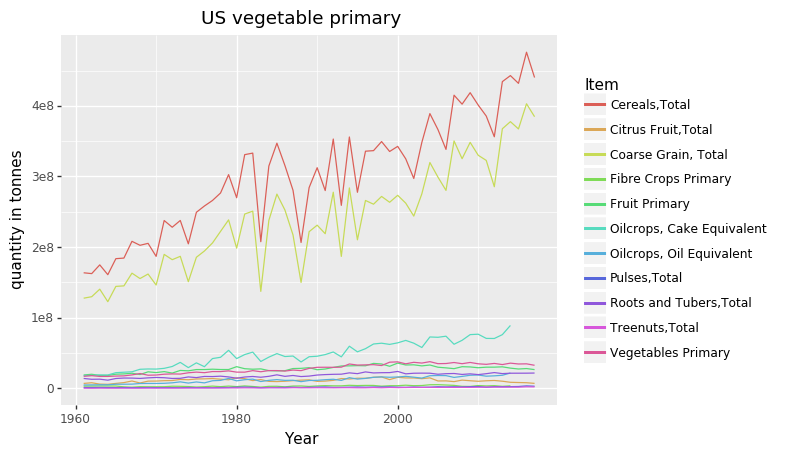

<ggplot: (272326050)>

In [54]:
(
    ggplot(all_crop, aes(x = "Year", y = "Value", color = "Item")) 
    + geom_line()
    + labs(title = "US vegetable primary", y = "quantity in tonnes")
)

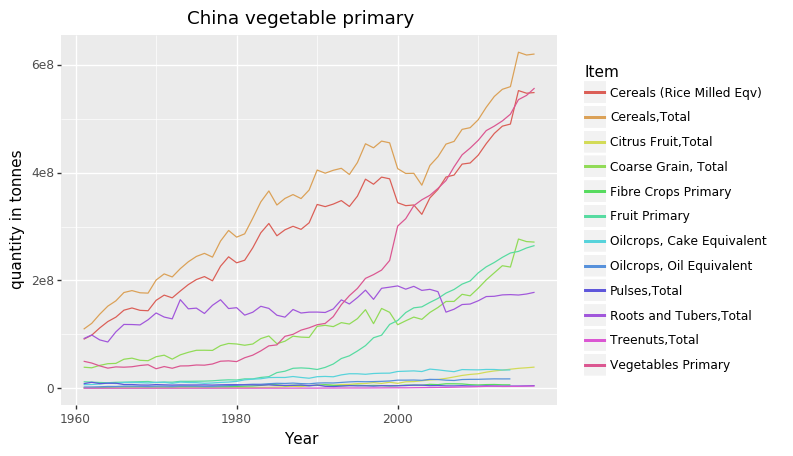

<ggplot: (7543916015)>

In [53]:
(
    ggplot(china_crop_all, aes(x = "Year", y = "Value", color = "Item")) 
    + geom_line()
    + labs(title = "China vegetable primary", y = "quantity in tonnes")
)

In [55]:
china_crop_all = pd.read_csv("/Users/bckou/Downloads/FAOSTAT_data_2-17-2019 (14).csv")
china_crop_all
china_crop_all["Item"].unique()
#all_crop_not_cc["Item"].unique()

NameError: name 'china_crop_all_' is not defined

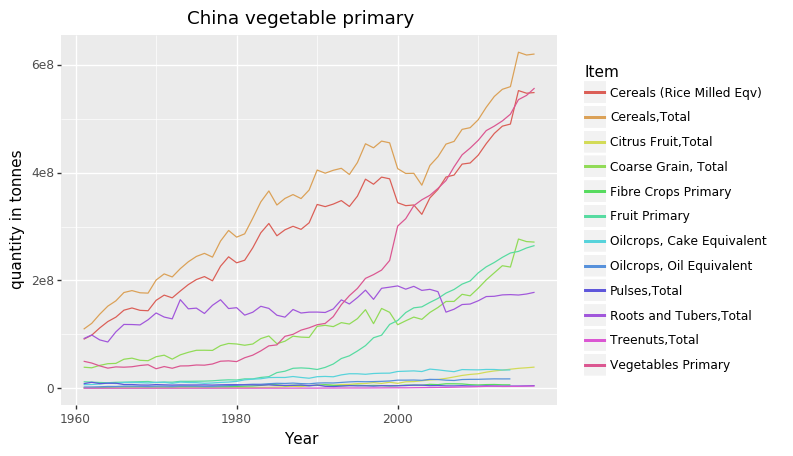

<ggplot: (-9223372036581754876)>

In [51]:
(
    ggplot(china_crop_all, aes(x = "Year", y = "Value", color = "Item")) 
    + geom_line()
    + labs(title = "China vegetable primary", y = "quantity in tonnes")
)

In [159]:
rate = pd.DataFrame([(cereals["Value"][a] - cereals["Value"][a-1]) / cereals["Value"][a] for a in range (1,len(cereals))])
rate0 = pd.DataFrame(["not defined"])
rate = rate0.append(rate)
cereals = pd.DataFrame(cereals)
type(rate)
pd.concat([cereals,rate])


,0,Area,Area Code,Domain,Domain Code,Element,Element Code,Flag,Flag Description,Item,Item Code,Unit,Value,Year,Year Code
0,NaN,United States of America,231.0,Crops,QC,Production,5510.0,A,"Aggregate, may include official, semi-official...","Cereals,Total",1717.0,tonnes,163619978.0,1961.0,1961.0
1,NaN,United States of America,231.0,Crops,QC,Production,5510.0,A,"Aggregate, may include official, semi-official...","Cereals,Total",1717.0,tonnes,162455780.0,1962.0,1962.0
2,NaN,United States of America,231.0,Crops,QC,Production,5510.0,A,"Aggregate, may include official, semi-official...","Cereals,Total",1717.0,tonnes,174812487.0,1963.0,1963.0
3,NaN,United States of America,231.0,Crops,QC,Production,5510.0,A,"Aggregate, may include official, semi-official...","Cereals,Total",1717.0,tonnes,160937079.0,1964.0,1964.0
4,NaN,United States of America,231.0,Crops,QC,Production,5510.0,A,"Aggregate, may include official, semi-official...","Cereals,Total",1717.0,tonnes,183602617.0,1965.0,1965.0
5,NaN,United States of America,231.0,Crops,QC,Production,5510.0,A,"Aggregate, may include official, semi-official...","Cereals,Total",1717.0,tonnes,184444880.0,1966.0,1966.0
6,NaN,United States of America,231.0,Crops,QC,Production,5510.0,A,"Aggregate, may include official, semi-official...","Cereals,Total",1717.0,tonnes,208158055.0,1967.0,1967.0
7,NaN,United States of America,231.0,Crops,QC,Production,5510.0,A,"Aggregate, may include official, semi-official...","Cereals,Total",1717.0,tonnes,202538423.0,1968.0,1968.0
8,NaN,United States of America,231.0,Crops,QC,Production,5510.0,A,"Aggregate, may include official, semi-official...","Cereals,Total",1717.0,tonnes,205288170.0,1969.0,1969.0
9,NaN,United States of America,231.0,Crops,QC,Production,5510.0,A,"Aggregate, may include official, semi-official...","Cereals,Total",1717.0,tonnes,186860751.0,1970.0,1970.0
